# Principal Component Analysis (PCA)

En esta notebook se implementa el algoritmo de PCA usando la perspectiva de proyección. Primero se implementa PCA, luego lo aplicamos al conjunto de datos MNIST. 

## Learning objectives

1. Escribir el código que implementa PCA. 
2. Escribir codigo que implementa PCA para high-dimensional datasets. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml  # before fetch_mldata: needed to import the minst dataset

## Data

In [2]:
images, labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

### EDA

In [3]:
type(images)

numpy.ndarray

In [4]:
images.shape

(70000, 784)

In [5]:
print('Total of images: ', images.shape[0])
print('Size of images (28 x 28): ', images.shape[1])

Total of images:  70000
Size of images (28 x 28):  784


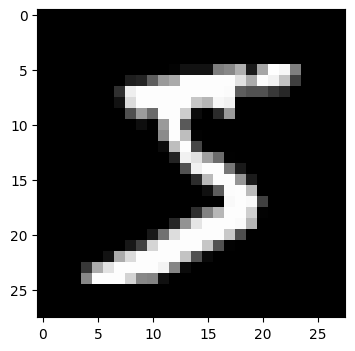

In [6]:
plt.figure(figsize=(4,4))
plt.imshow(images[0].reshape(28,28), cmap='gray')

In [7]:
type(labels[0])

str

In [8]:
print('The 0 label must be a 5 -> ', labels[0], int(labels[0]) == 5)

The 0 label must be a 5 ->  5 True


###  Data preprocessing

1. Normalizar los datos (cada pixel debe estar entre 0 y 1). 
2. Substraer de cada imagen $\mu$. 
3. Escalar cada imagen por $1/\sigma$. 

In [9]:
images.mean(axis=0)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.80000000e-03, 6.71428571e-03, 3.08571429e-03, 1.28571429e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.28571429e-04, 1.32857143e-03, 1.13285714e-02, 2.30714286e-02,
       4.32285714e-02, 6.22428571e-02, 1.17928571e-01, 1.71242857e-01,
       1.93414286e-01, 1.90085714e-01, 2.06285714e-01, 1.82742857e-01,
       1.70100000e-01, 1.44514286e-01, 9.92428571e-02, 6.82285714e-02,
       4.88714286e-02, 1.83142857e-02, 8.64285714e-03, 3.02857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [10]:
images.std(axis=0)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.40061249e-01, 1.26020885e+00, 8.16397430e-01, 3.40165596e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.04738837e-02, 2.30430542e-01, 1.32273535e+00, 2.02952401e+00,
       2.95101239e+00, 3.24199632e+00, 4.82037862e+00, 5.67715008e+00,
       6.05192338e+00, 5.89715515e+00, 6.24349860e+00, 5.92008489e+00,
       5.61973006e+00, 5.26610197e+00, 4.32835099e+00, 3.68131215e+00,
       3.03281531e+00, 1.79894620e+00, 1.12138799e+00, 7.46739177e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [11]:
images.max(axis=0)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116,
       254, 216,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16,  47, 236, 254, 255, 254, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 244, 255, 184, 197,
         0,   0,   0,   0,   0,   0,  64,  29, 134, 192, 254, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 165,   0,   0,   0,   0, 141, 101, 139, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 234, 163,   0,   0,  38, 144, 114, 254,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 246,  63,   0,  24,  95,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  93,   0,
         7, 210, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [ ]:
def normalize_images(X: np.ndarray): 
    """
    Normalize the set of images. 
    """ 
    minv = X.min(axis=0)
    maxv = X.max(axis=0)
    rangev = maxv - minv
    rangev[rangev == 0] = 1
    normalized = (X - minv) / rangev
    return normalized

In [13]:
nimages = normalize_images(images)

In [14]:
nimages[0].min()

np.float64(0.0)

In [15]:
nimages[0].max()

np.float64(1.0)

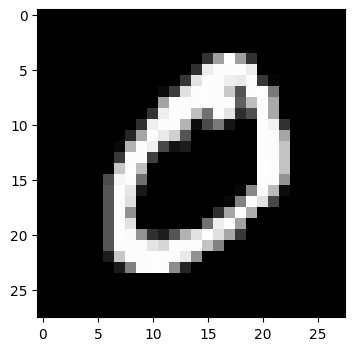

In [16]:
plt.figure(figsize=(4,4))
plt.imshow(nimages[1].reshape(28,28), cmap='gray')

In [ ]:
def normalize_data(X: np.ndarray):
    """
    Normalize the given dataset X. 
    """ 
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    std_filled = std.copy()
    std_filled[std == 0] = 1.0
    X_b = ((X - mu) / std_filled)
    return X_b, mu, std

In [18]:
nimages.mean(axis=0).max()

np.float64(0.5490786554621849)

In [19]:
nimages.std(axis=0).max()

np.float64(0.44660973867773096)

In [20]:
X_b, mu, std = normalize_data(nimages)

In [22]:
print(X_b.max())
print(X_b.min())

264.5732412773446
-1.2778690230072927


## PCA 

En las siguientes celdas se implementa PCA. 
Asumimos que ejecutamos PCA en un dataset $\textbf{X}$ para $\textbf{M}$ componentes principales. Una vez normalizados los datos, lo siguiente es encontrar los eigenvectores (principal components) y los eigenvalores para la matriz de covarianza $\textbf{S}$. Estos eigenvalores deben ordenarse de mayor a menor con sus respectivos eigenvectores. 

Después de esto, podemos computar la proyección y la reconstruccion de los datos originales en el espacio generado por los $n$ eigenvalores más significativos. 

In [23]:
def eig(S: np.ndarray): 
    pass


In [24]:
def projection_matrix(B: np.ndarray): 
    pass

In [25]:
def PCA(X: np.ndarray, ncomponents: int): 
    pass